## Task 1: Import Libraries

In [ ]:
!pip install livelossplot

In [ ]:
from livelossplot.inputs.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.4.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 2: Load and Preprocess Data

In [ ]:
train_images = pd.read_csv('drive/My Drive/COVID/mel_dataset/train/image_onhe.csv')
train_labels = pd.read_csv('drive/My Drive/COVID/mel_dataset/train/label_onhe.csv')

val_images = pd.read_csv('drive/My Drive/COVID/mel_dataset/validation/image_onhe.csv')
val_labels= pd.read_csv('drive/My Drive/COVID/mel_dataset/validation/label_onhe.csv')

In [ ]:
#train_images = train_images.drop(0).reset_index().drop('index',axis=1)

In [ ]:
train_images

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,86160,86161,86162,86163,86164,86165,86166,86167,86168,86169,86170,86171,86172,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182,86183,86184,86185,86186,86187,86188,86189,86190,86191,86192,86193,86194,86195,86196,86197,86198,86199
0,0.980392,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.172549,0.176471,0.054902,0.023529,0.105882,0.090196,0.050980,0.078431,0.094118,0.105882,0.211765,0.109804,0.219608,0.203922,0.176471,0.227451,0.254902,0.117647,0.168627,0.149020,0.207843,0.149020,0.105882,0.254902,0.258824,0.223529,0.200000,0.164706,0.090196,0.058824,0.015686,0.015686,0.082353,0.247059,0.254902,0.207843,0.184314,0.270588,0.035294,0.043137
1,0.890196,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.113725,0.247059,0.098039,0.098039,0.078431,0.058824,0.090196,0.078431,0.180392,0.058824,0.086275,0.200000,0.196078,0.156863,0.082353,0.090196,0.133333,0.133333,0.172549,0.074510,0.149020,0.078431,0.184314,0.027451,0.031373,0.109804,0.113725,0.066667,0.109804,0.109804,0.133333,0.192157,0.466667,0.250980,0.133333,0.188235,0.368627,0.074510,0.109804,0.121569
2,0.925490,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.266667,0.219608,0.282353,0.407843,0.278431,0.231373,0.274510,0.278431,0.156863,0.145098,0.270588,0.207843,0.301961,0.266667,0.325490,0.301961,0.290196,0.278431,0.192157,0.207843,0.149020,0.211765,0.211765,0.403922,0.329412,0.325490,0.235294,0.329412,0.360784,0.239216,0.388235,0.243137,0.305882,0.274510,0.329412,0.356863,0.337255,0.337255,0.462745,0.501961
3,0.925490,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.227451,0.313725,0.298039,0.168627,0.262745,0.176471,0.168627,0.145098,0.156863,0.321569,0.298039,0.266667,0.298039,0.266667,0.196078,0.164706,0.211765,0.235294,0.243137,0.223529,0.286275,0.345098,0.274510,0.243137,0.172549,0.149020,0.309804,0.352941,0.329412,0.345098,0.313725,0.294118,0.337255,0.129412,0.160784,0.172549,0.250980,0.231373,0.337255,0.235294
4,0.776471,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.270588,0.172549,0.250980,0.215686,0.223529,0.262745,0.227451,0.125490,0.176471,0.149020,0.141176,0.196078,0.137255,0.078431,0.101961,0.286275,0.215686,0.231373,0.098039,0.219608,0.223529,0.400000,0.200000,0.188235,0.254902,0.227451,0.258824,0.141176,0.141176,0.152941,0.388235,0.172549,0.141176,0.043137,0.070588,0.023529,0.121569,0.105882,0.105882,0.109804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.345098,0.372549,0.333333,0.301961,0.458824,0.388235,0.360784,0.396078,0.525490,0.419608,0.298039,0.356863,0.384314,0.372549,0.407843,0.423529,0.372549,0.364706,0.333333,0.282353,0.215686,0.156863,0.101961,0.180392,0.254902,0.435294,0.270588,0.364706,0.352941,0.349020,0.403922,0.384314,0.321569,0.427451,0.356863,0.474510,0.411765,0.368627,0.372549,0.400000
60,0.815686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.

In [ ]:
#val_images = val_images.drop(0).reset_index().drop('index',axis=1)

In [ ]:
val_images

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,86160,86161,86162,86163,86164,86165,86166,86167,86168,86169,86170,86171,86172,86173,86174,86175,86176,86177,86178,86179,86180,86181,86182,86183,86184,86185,86186,86187,86188,86189,86190,86191,86192,86193,86194,86195,86196,86197,86198,86199
0,0.831373,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.145098,0.223529,0.278431,0.129412,0.145098,0.137255,0.431373,0.176471,0.200000,0.113725,0.176471,0.109804,0.066667,0.074510,0.160784,0.086275,0.160784,0.368627,0.184314,0.239216,0.160784,0.239216,0.082353,0.054902,0.227451,0.211765,0.129412,0.305882,0.243137,0.145098,0.117647,0.137255,0.180392,0.200000,0.176471,0.239216,0.203922,0.129412,0.152941,0.168627
1,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.254902,0.141176,0.098039,0.149020,0.168627,0.196078,0.219608,0.164706,0.164706,0.427451,0.301961,0.266667,0.219608,0.270588,0.290196,0.298039,0.298039,0.298039,0.196078,0.243137,0.250980,0.321569,0.309804,0.247059,0.278431,0.262745,0.223529,0.239216,0.305882,0.227451,0.164706,0.207843,0.250980,0.290196,0.168627,0.258824,0.160784,0.160784,0.219608,0.192157
2,0.811765,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.313725,0.415686,0.078431,0.086275,0.160784,0.223529,0.231373,0.133333,0.172549,0.133333,0.133333,0.121569,0.211765,0.184314,0.317647,0.160784,0.203922,0.184314,0.160784,0.200000,0.298039,0.247059,0.168627,0.121569,0.082353,0.000000,0.086275,0.090196,0.086275,0.160784,0.223529,0.200000,0.325490,0.262745,0.203922,0.137255,0.027451,0.050980,0.235294,0.168627
3,0.800000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.125490,0.125490,0.098039,0.043137,0.082353,0.168627,0.047059,0.050980,0.003922,0.003922,0.050980,0.043137,0.027451,0.058824,0.078431,0.164706,0.254902,0.266667,0.047059,0.000000,0.007843,0.129412,0.054902,0.141176,0.141176,0.317647,0.192157,0.168627,0.176471,0.278431,0.207843,0.156863,0.176471,0.125490,0.098039,0.196078,0.152941,0.180392,0.305882,0.298039
4,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.152941,0.152941,0.247059,0.207843,0.203922,0.329412,0.258824,0.364706,0.329412,0.270588,0.380392,0.298039,0.254902,0.298039,0.305882,0.380392,0.294118,0.423529,0.309804,0.294118,0.298039,0.360784,0.290196,0.278431,0.211765,0.243137,0.192157,0.231373,0.211765,0.274510,0.239216,0.203922,0.168627,0.196078,0.239216,0.333333,0.290196,0.250980,0.219608,0.309804
5,0.894118,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.203922,0.176471,0.329412,0.200000,0.192157,0.192157,0.219608,0.152941,0.145098,0.301961,0.239216,0.337255,0.317647,0.192157,0.231373,0.164706,0.152941,0.129412,0.113725,0.113725,0.243137,0.180392,0.192157,0.211765,0.149020,0.176471,0.227451,0.250980,0.278431,0.290196,0.266667,0.156863,0.223529,0.215686,0.168627,0.125490,0.203922,0.239216,0.392157,0.239216
6,0.760784,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.141176,0.172549,0.384314,0.478431,0.309804,0.239216,0.239216,0.180392,0.156863,0.203922,0.290196,0.188235,0.160784,0.176471,0.364706,0.396078,0.309804,0.262745,0.066667,0.019608,0.101961,0.160784,0.172549,0.172549,0.278431,0.200000,0.266667,0.403922,0.200000,0.141176,0.090196,0.262745,

In [ ]:
train_labels

,labels
0,crackles
1,both
2,wheezes
3,crackles
4,NaN
...,...
59,wheezes
60,crackles
61,wheezes
62,crackles


In [ ]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)

Training set shape: (64, 86200) (64, 1)
Validation set shape: (16, 86200) (16, 1)


In [ ]:
x_train = train_images.values.reshape(64,200, 431, 1)

In [ ]:
x_val = val_images.values.reshape(16,200, 431, 1)

In [ ]:
a=[]

In [ ]:
p = val_labels.copy()
a = p['labels'].apply(lambda x: [1,0,0,0] if x=='both' else([0,1,0,0] if x=='crackles' else([0,0,0,1] if x=='wheezes' else([0,0,1,0]))))

In [ ]:
y_val = pd.DataFrame(list(a))

In [ ]:
b = []

In [ ]:
m = train_labels.copy()
b = m['labels'].apply(lambda x: [1,0,0,0] if x=='both' else([0,1,0,0] if x=='crackles' else([0,0,0,1] if x=='wheezes' else([0,0,1,0]))))

In [ ]:
y_train = pd.DataFrame(list(b))

In [ ]:
y_val

,0,1,2,3
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,0,1,0
9,0,1,0,0


In [ ]:
y_train

,0,1,2,3
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
59,0,0,0,1
60,0,1,0,0
61,0,0,0,1
62,0,1,0,0


## Task 3: Plot 2D Spectrograms

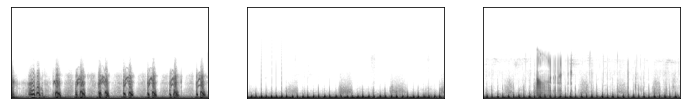

In [ ]:
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])])
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

## Task 4: Create Training and Validation Data Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)
datagen_val.fit(x_val)

In [ ]:
ImageDataGenerator?

## Task 5: Creating the CNN Model

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32, (5,5), padding='same', input_shape=(200, 431, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# 2nd Convolution layer
model.add(Conv2D(64, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))

## Task 6: Learning Rate Scheduling and Compile the Model

In [ ]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 431, 32)      832       
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 431, 32)      128       
_________________________________________________________________
activation_3 (Activation)    (None, 200, 431, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 215, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 215, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 215, 64)      51264     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 215, 64)     

## Task 7: Training the Model

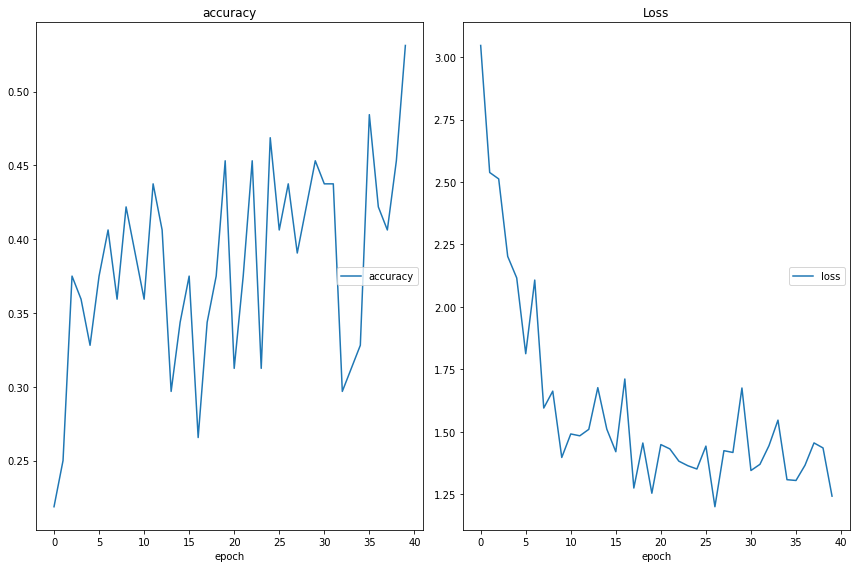

accuracy
	accuracy         	 (min:    0.219, max:    0.531, cur:    0.531)
Loss
	loss             	 (min:    1.200, max:    3.047, cur:    1.243)


In [ ]:
checkpoint = ModelCheckpoint('model_weight.h5', monitor='val_loss',
                            save_weights_only=True, mode='min', verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]

batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch = len(x_train) // batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val) // batch_size,
    epochs=40,
    callbacks=callbacks
)

In [ ]:
test_loss, test_acc = model.evaluate(x_val,y_val)
print('test_acc: ',test_acc)

1/1 [==============================] - 2s 2s/step - loss: 2.0890 - accuracy: 0.1250
test_acc:  0.125
